In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import sys
import datetime
import scipy.io as sio
from time import time

import seaborn as sns
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn import manifold, datasets, metrics
from sklearn.manifold import SpectralEmbedding

### Load the dataset & data clean

In [2]:
# load the dataset
os.chdir("/disk/r103/wangmeilan/CSIC5011")
mat_contents = sio.loadmat("face.mat")
np0 = mat_contents["Y"] #.transpose()

# training set
X = np0.reshape(112*92, 33).transpose()

# ground truth ordered manually
g_truth = [8,13,19,32,6,18,28,7,17,1,5,16,12,10,4,21,22,26,33,11,2,24,3,27,29,23,15,30,31,20,14,25,9]

### Hyperparameters (n_components = 2, n_neighbors = 5 ~ 10)

In [3]:
n_components = 2

In [4]:
for n_neighbors in [5,6,7,8,9,10]:
    # create an empty dataframe to summarise the performance metrics result
    mf_result = pd.DataFrame(np.zeros(shape=(8,1),dtype=float))
    mf_result.index = ['ISOMAP','LLE','Modified LLE','Hessian LLE','Spectrum Embedding','LTSA','MDS','t-SNE']
    # ISOMAP
    Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
    #mf_result.iloc[0,0] = Y[:,0].argsort()
    mf_result.iloc[0,0] = str(Y[:,0].argsort())
    # LLE
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,eigen_solver='auto',
                                        method='standard').fit_transform(X)
    mf_result.iloc[1,0] = Y[:,0].argsort()
    # Modified LLE
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,eigen_solver='auto',
                                        method='modified').fit_transform(X)
    mf_result.iloc[2,0] = Y[:,0].argsort()
    # Hessian LLE
    Y = manifold.LocallyLinearEmbedding(n_neighbors=10, n_components=2,eigen_solver='dense',
                                        method='hessian').fit_transform(X)
    mf_result.iloc[3,0] = Y[:,0].argsort()
    # Spectrual Embedding
    Y = manifold.SpectralEmbedding(n_components=n_components,
                                    n_neighbors=n_neighbors).fit_transform(X)
    mf_result.iloc[4,0] = Y[:,0].argsort()
    # LTSA
    Y = manifold.LocallyLinearEmbedding(n_neighbors=10, n_components=2,eigen_solver='dense',method='ltsa').fit_transform(X)
    mf_result.iloc[5,0] = Y[:,0].argsort()
    # MDS
    Y = manifold.MDS(n_components, max_iter=100, n_init=1).fit_transform(X)
    mf_result.iloc[6,0] = Y[:,0].argsort()
    # t-SNE
    Y = manifold.TSNE(n_components=n_components, init='pca', random_state=0).fit_transform(X)
    mf_result.iloc[7,0] = Y[:,0].argsort()
    # save the result
    mf_result.to_csv('original_result_%scomponents_%sneighbors.csv' % (n_components,n_neighbors))

In [5]:
# define a function to calculate the MAE
def result_mae(Y):
    pred_0 = np.flip(Y[:,0].argsort())
    pred_1 = [x+1 for x in pred_0]
    pred_2 = np.array(pred_1).argsort()
    pred = [x+1 for x in pred_2]
    # MAE
    mae1 = metrics.mean_absolute_error(g_truth,pred)
    mae2 = metrics.mean_absolute_error(g_truth,np.flip(pred))
    mae = min(mae1, mae2)
    return mae

for n_neighbors in [5,6,7,8,9,10]:
    # create an empty dataframe to summarise the performance metrics result
    mf_result = pd.DataFrame(np.zeros(shape=(8,2),dtype=float))
    mf_result.columns = ['MAE','TAE']
    mf_result.index = ['ISOMAP','LLE','Modified LLE','Hessian LLE','Spectrum Embedding','LTSA','MDS','t-SNE']
    # ISOMAP
    Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
    mf_result.iloc[0,0] = result_mae(Y)
    # LLE
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,eigen_solver='auto',
                                        method='standard').fit_transform(X)
    mf_result.iloc[1,0] = result_mae(Y)
    # Modified LLE
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,eigen_solver='auto',
                                        method='modified').fit_transform(X)
    mf_result.iloc[2,0] = result_mae(Y)
    # Hessian LLE
    Y = manifold.LocallyLinearEmbedding(n_neighbors=10, n_components=2,eigen_solver='dense',
                                        method='hessian').fit_transform(X)
    mf_result.iloc[3,0] = result_mae(Y)
    # Spectrual Embedding
    Y = manifold.SpectralEmbedding(n_components=n_components,
                                    n_neighbors=n_neighbors).fit_transform(X)
    mf_result.iloc[4,0] = result_mae(Y)
    # LTSA
    Y = manifold.LocallyLinearEmbedding(n_neighbors=10, n_components=2,eigen_solver='dense',method='ltsa').fit_transform(X)
    mf_result.iloc[5,0] = result_mae(Y)
    # MDS
    Y = manifold.MDS(n_components, max_iter=100, n_init=1).fit_transform(X)
    mf_result.iloc[6,0] = result_mae(Y)
    # t-SNE
    Y = manifold.TSNE(n_components=n_components, init='pca', random_state=0).fit_transform(X)
    mf_result.iloc[7,0] = result_mae(Y)
    mf_result.iloc[:,1] = mf_result.iloc[:,0] * 33
    # save the result
    mf_result.to_csv('result_%scomponents_%sneighbors.csv' % (n_components, n_neighbors))

### Plots

/disk/r103/wangmeilan/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


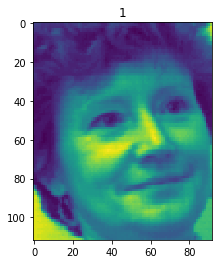

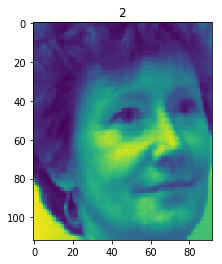

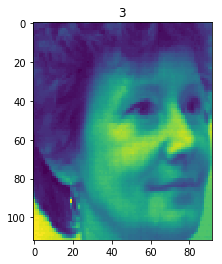

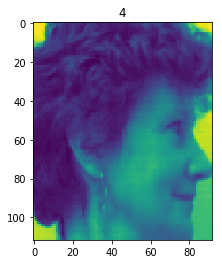

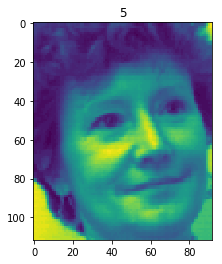

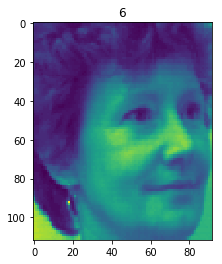

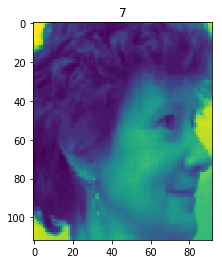

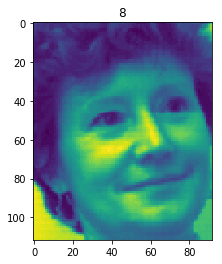

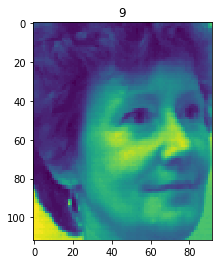

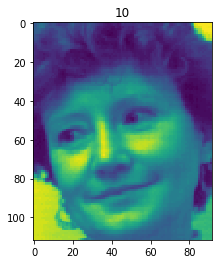

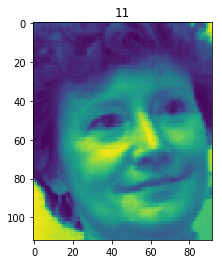

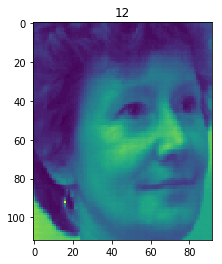

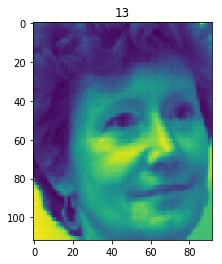

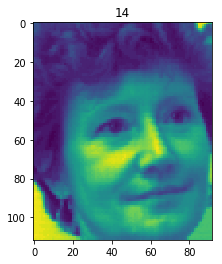

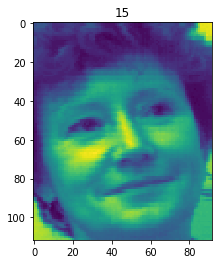

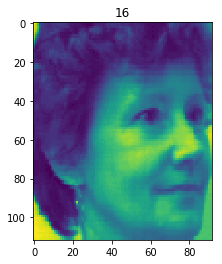

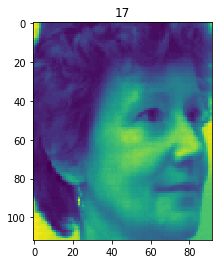

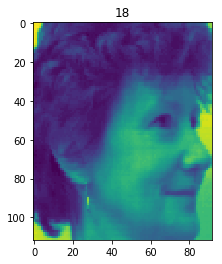

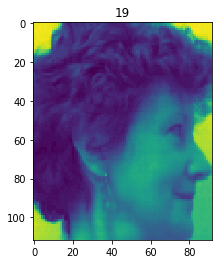

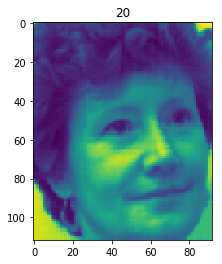

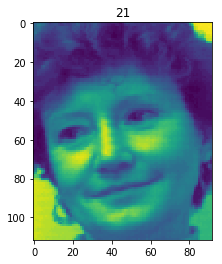

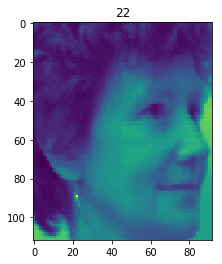

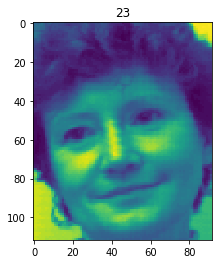

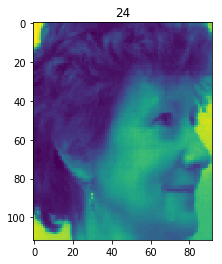

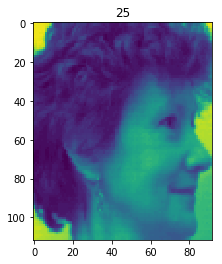

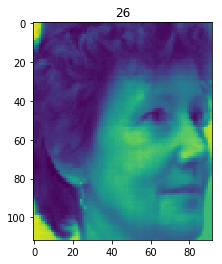

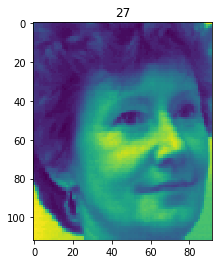

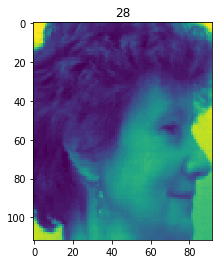

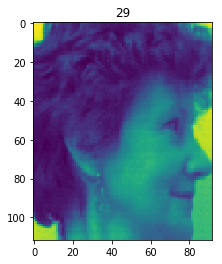

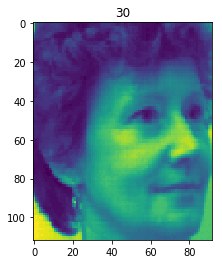

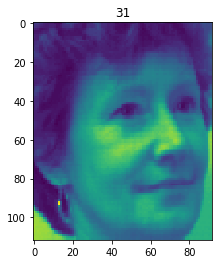

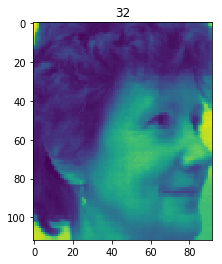

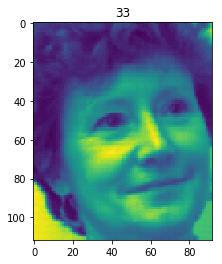

In [6]:
# plot all the figures
for i in list(range(33)):
    plt.figure()
    plt.imshow(np0[:,:,i])
    plt.title('%s' % (i+1))
    plt.savefig('%s.jpg' % (i+1))

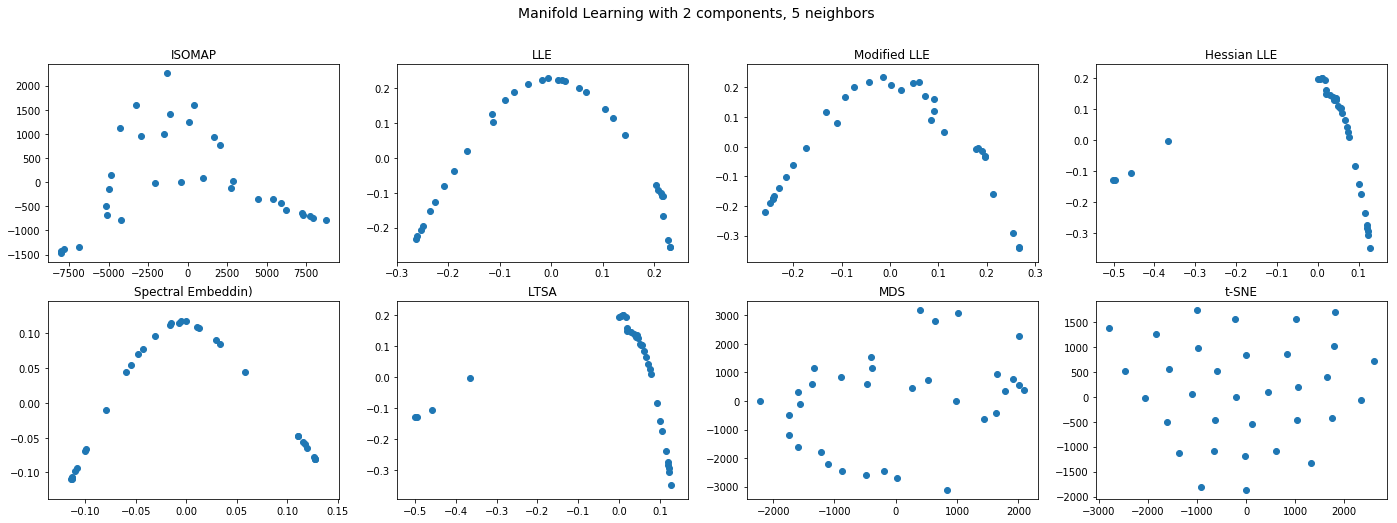

In [7]:
# plot result of different model
n_components = 2
n_neighbors = 5

# take n_components=2 & n_
plt.figure(figsize=(24,8))
plt.suptitle("Manifold Learning with %s components, %s neighbors"
             % (n_components, n_neighbors), fontsize=14)

Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
plt.subplot(2, 4, 1)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.title("ISOMAP")

Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,eigen_solver='auto',
                                    method='standard').fit_transform(X)
plt.subplot(2, 4, 2)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.title("LLE")

Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,eigen_solver='auto',
                                    method='modified').fit_transform(X)
plt.subplot(2, 4, 3)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.title("Modified LLE" )

Y = manifold.LocallyLinearEmbedding(n_neighbors=10, n_components=2,eigen_solver='dense',
                                    method='hessian').fit_transform(X)
plt.subplot(2, 4, 4)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.title("Hessian LLE")

Y = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors).fit_transform(X)
plt.subplot(2, 4, 5)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.title("Spectral Embeddin)")

Y = manifold.LocallyLinearEmbedding(n_neighbors=10, n_components=2,eigen_solver='dense',method='ltsa').fit_transform(X)
plt.subplot(2, 4, 6)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.title("LTSA")

Y = manifold.MDS(n_components, max_iter=100, n_init=1).fit_transform(X)
plt.subplot(2, 4, 7)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.title("MDS")

Y = manifold.TSNE(n_components=n_components, init='pca', random_state=0).fit_transform(X)
plt.subplot(2, 4, 8)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.title("t-SNE" )

plt.show()


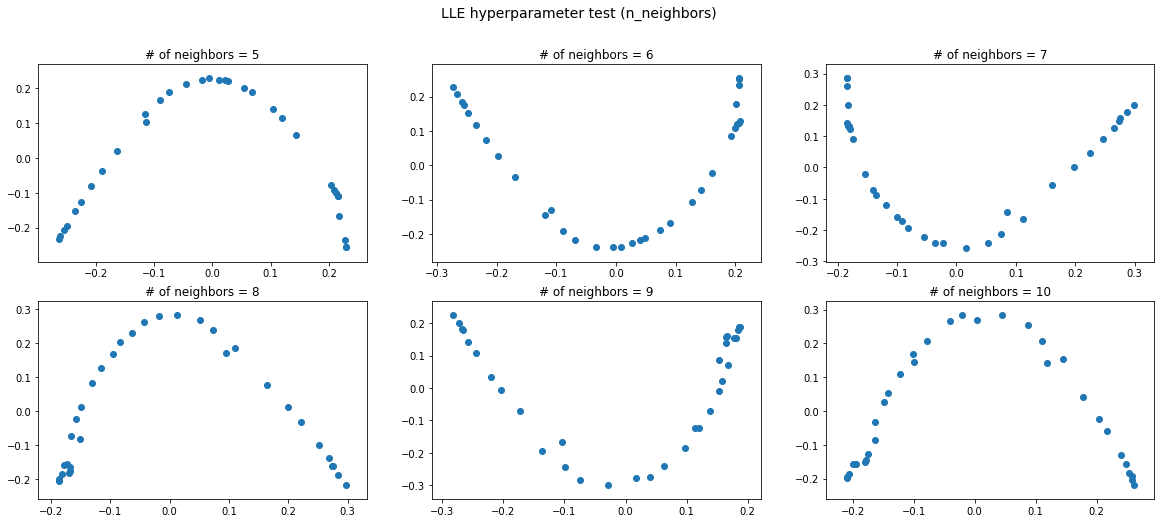

In [10]:
# plot result of different n_neighbor(5~10) for LLE
plt.figure(figsize=(20,8))
plt.suptitle("LLE hyperparameter test (n_neighbors)", fontsize=14)
n_components = 2

for i in list(range(6)):
    n_neighbors = i+5
    plt.subplot(2, 3, i+1)
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,eigen_solver='auto',
                                    method='standard').fit_transform(X)
    plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
    plt.title("# of neighbors = %s" % (n_neighbors))

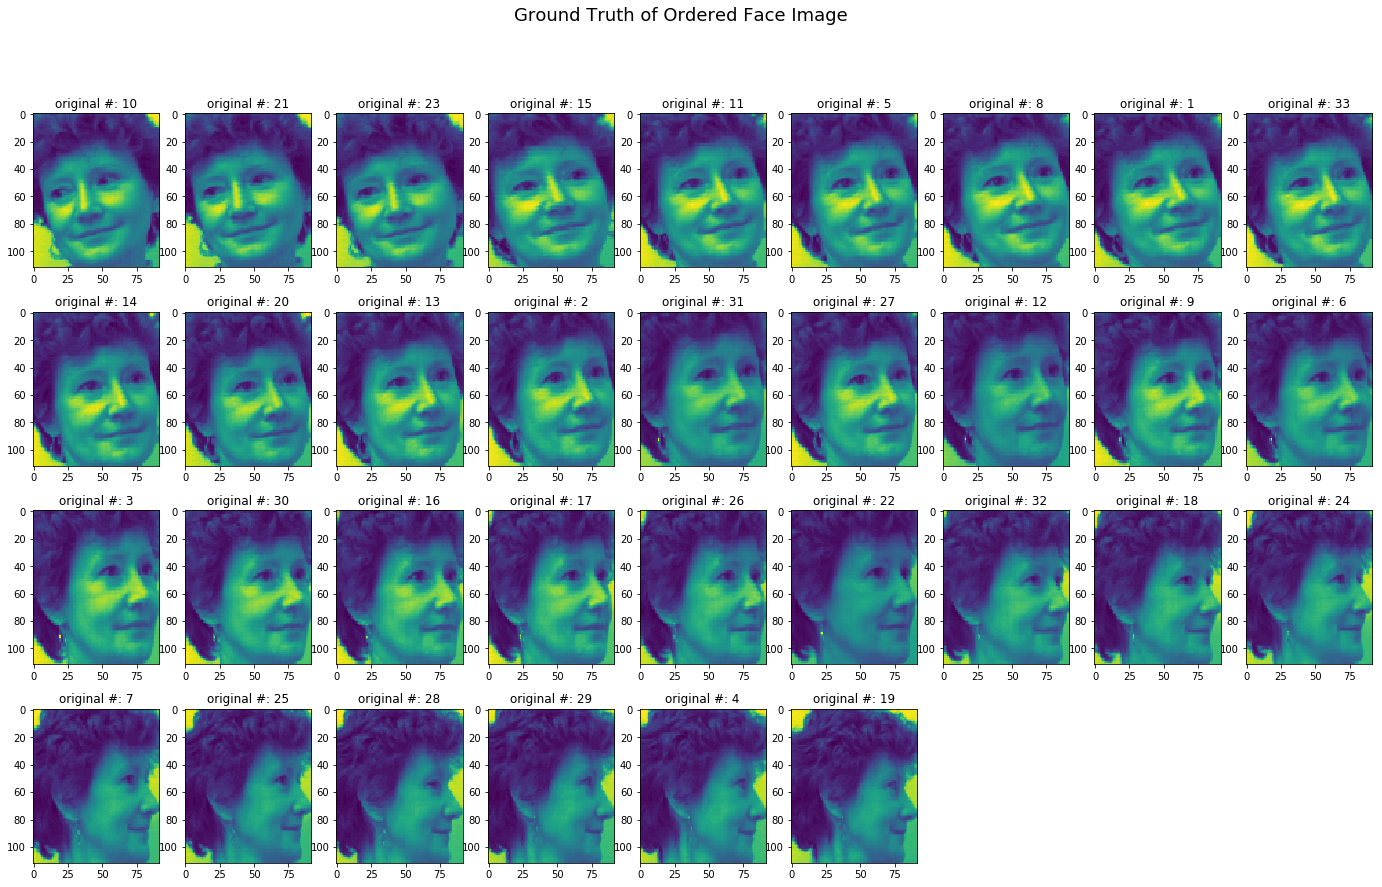

In [11]:
# plot the ground truth subplots in one figure
plt.figure(figsize=(24,14))
plt.suptitle("Ground Truth of Ordered Face Image", fontsize=18)

for i in list(range(33)):
    fig_pos = g_truth[i]
    plt.subplot(4, 9, fig_pos) 
    plt.imshow(np0[:,:,i])
    plt.title("original #: %s" % (i+1))

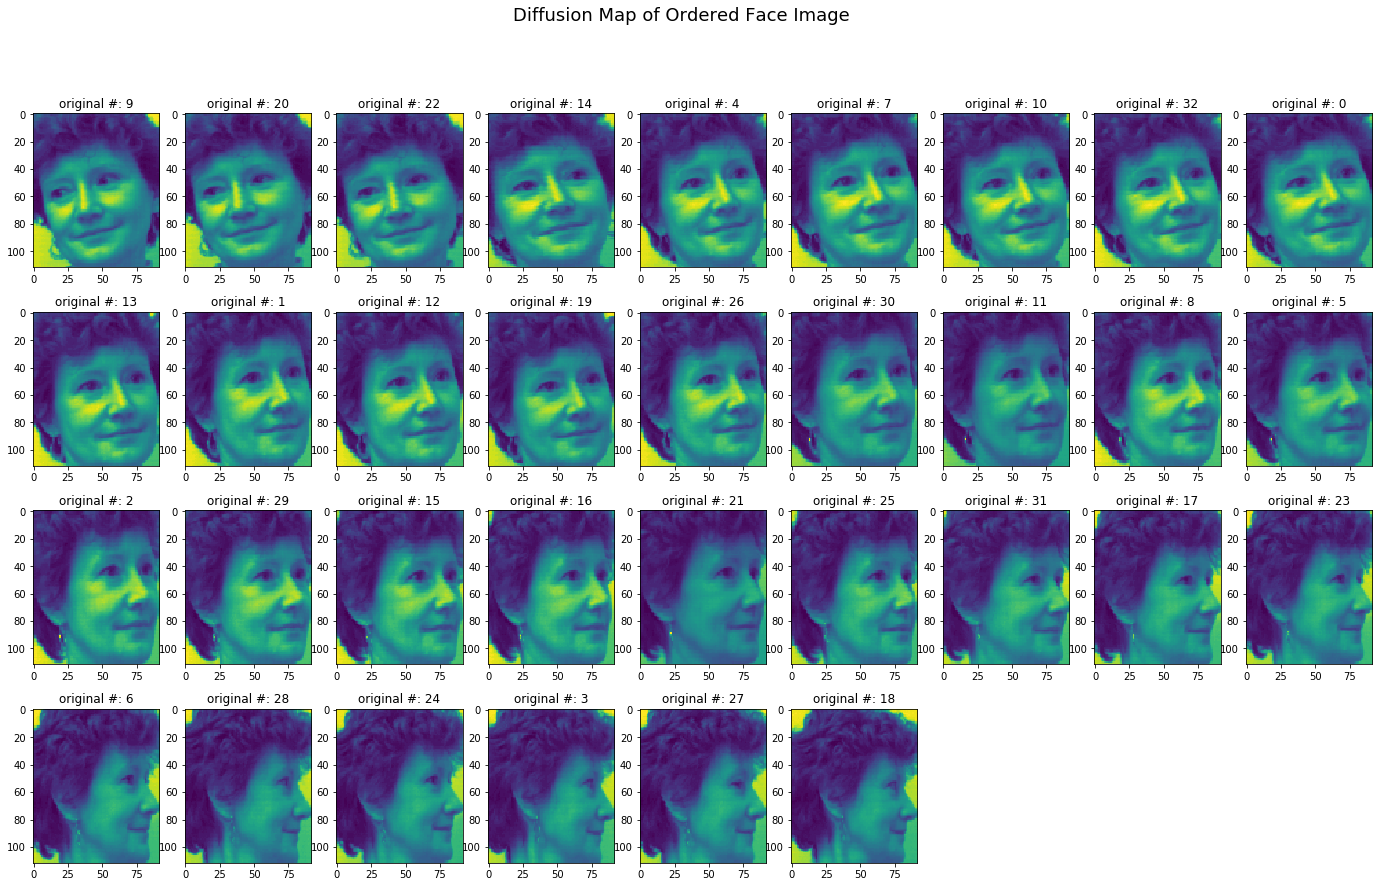

In [12]:
# plot the Diffusion map subplots in one figure
dm_result = [10,21,23,15,5,8,11,33,1,14,2,13,20,27,31,12,9,6,3,30,16,17,22,26,32,18,24,7,29,25,4,28,19
]
plt.figure(figsize=(24,14))
plt.suptitle("Diffusion Map of Ordered Face Image", fontsize=18)

for i in list(range(33)):
    fig_no = dm_result[i]-1
    plt.subplot(4, 9, i+1) 
    plt.imshow(np0[:,:,fig_no])
    plt.title("original #: %s" % (fig_no))

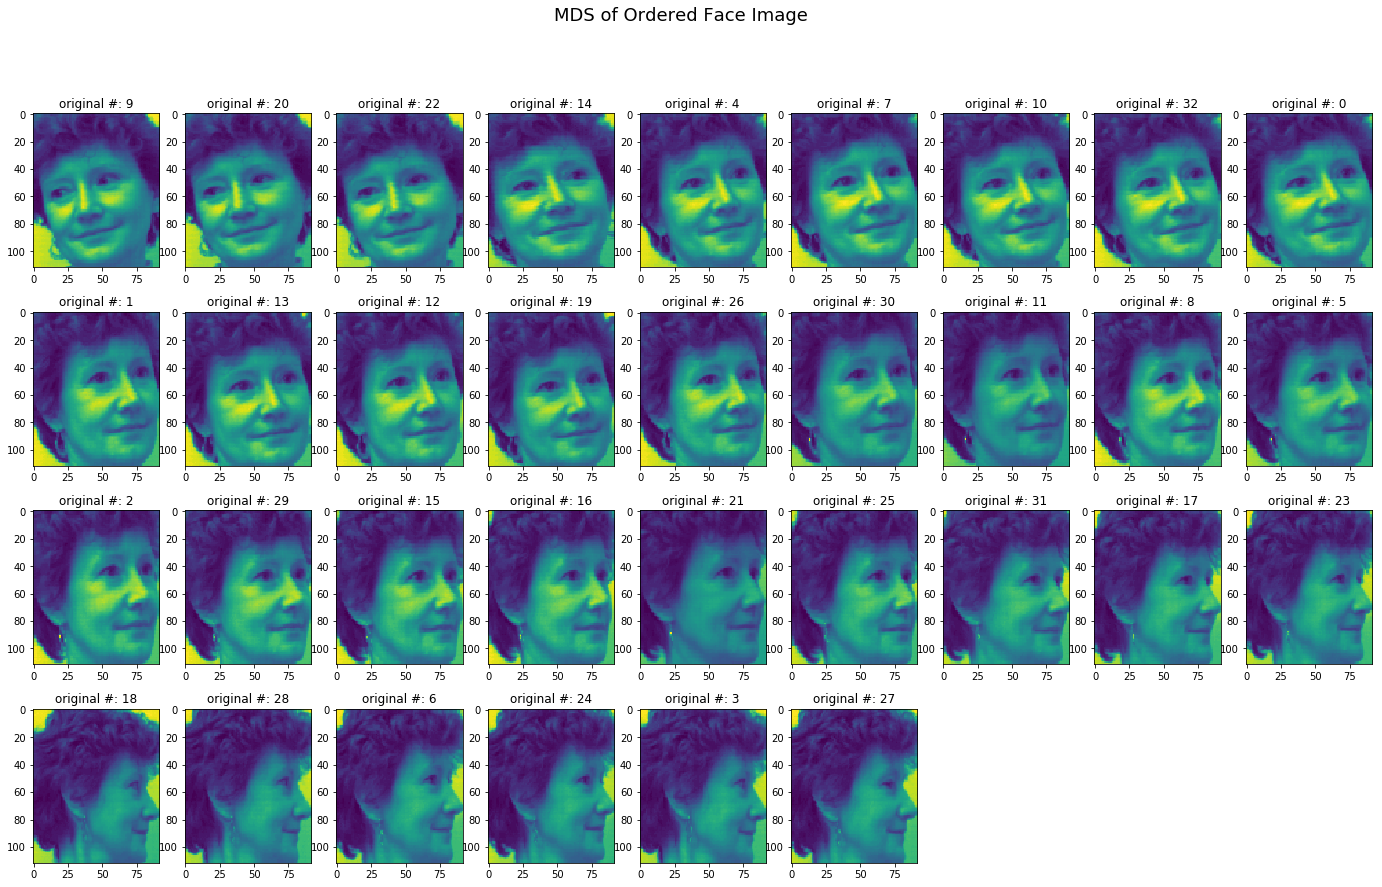

In [13]:
# plot the MDS subplots in one figure
result1 = [10,21,23,15,5,8,11,33,1,2,14,13,20,27,31,12,9,6,3,30,16,17,22,26,32,18,24,19,29,7,25,4,28]
plt.figure(figsize=(24,14))
plt.suptitle("MDS of Ordered Face Image", fontsize=18)

for i in list(range(33)):
    fig_no = result1[i]-1
    plt.subplot(4, 9, i+1) 
    plt.imshow(np0[:,:,fig_no])
    plt.title("original #: %s" % (fig_no))

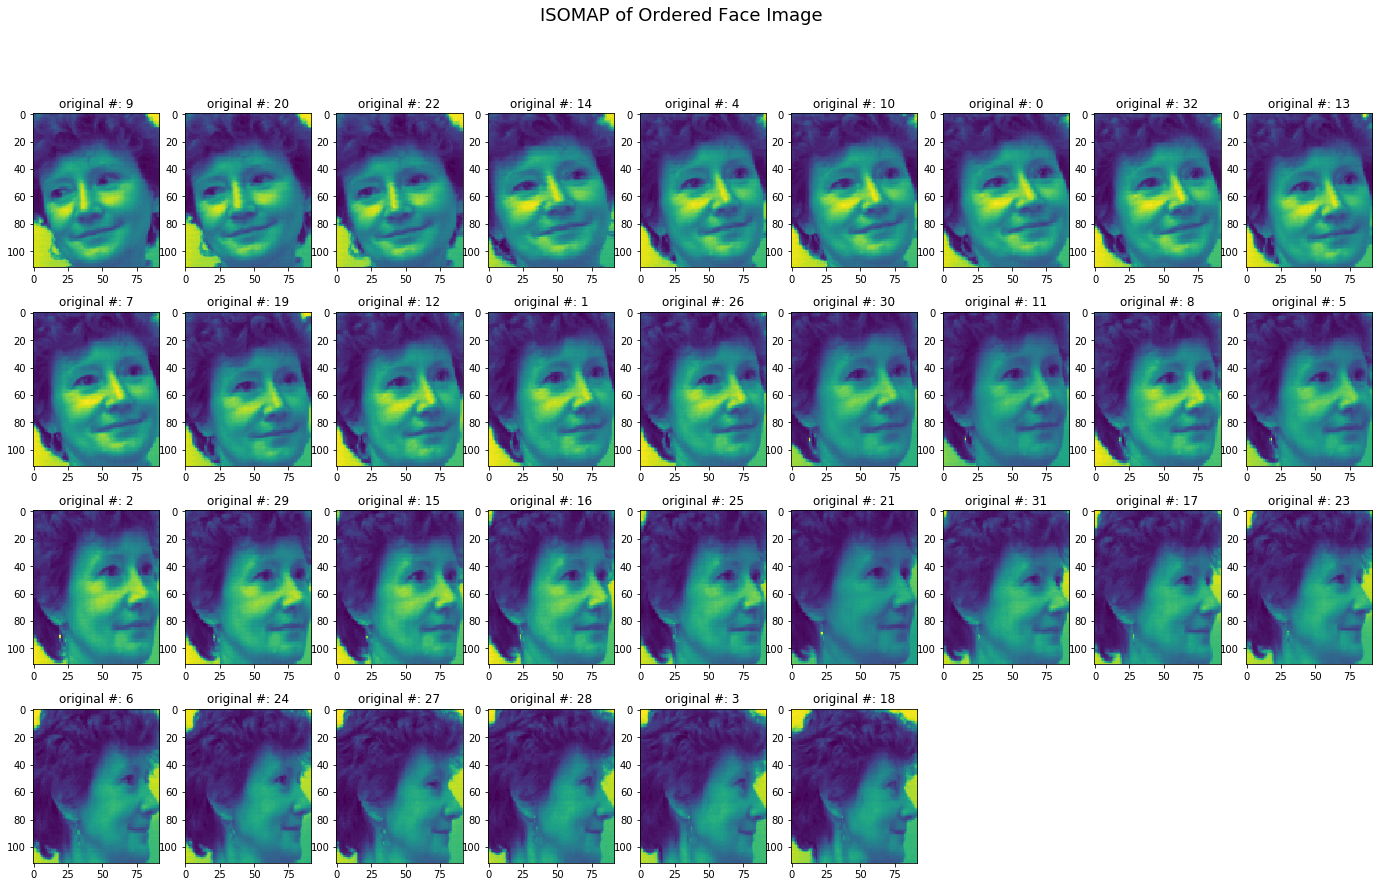

In [14]:
# plot the ISOMAP subplots in one figure
result1 = [10,21,23,15,5,11,1,33,14,8,20,13,2,27,31,12,9,6,3,30,16,17,26,22,32,18,24,7,25,28,29,4,19]
plt.figure(figsize=(24,14))
plt.suptitle("ISOMAP of Ordered Face Image", fontsize=18)

for i in list(range(33)):
    fig_no = result1[i]-1
    plt.subplot(4, 9, i+1) 
    plt.imshow(np0[:,:,fig_no])
    plt.title("original #: %s" % (fig_no))

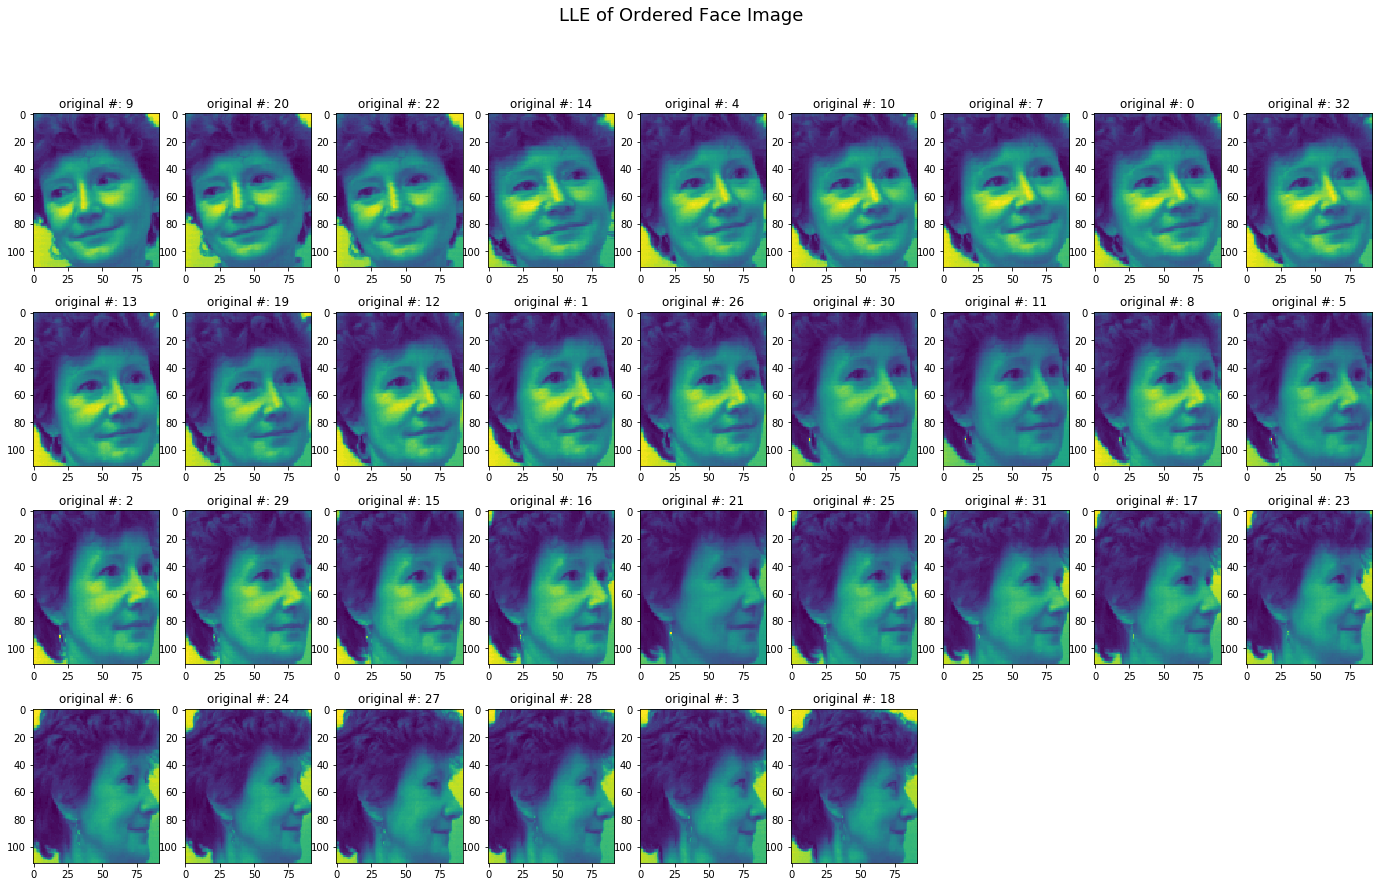

In [15]:
# plot the ISOMAP subplots in one figure
result1 = [10,21,23,15,5,11,8,1,33,14,20,13,2,27,31,12,9,6,3,30,16,17,22,26,32,18,24,7,25,28,29,4,19]
plt.figure(figsize=(24,14))
plt.suptitle("LLE of Ordered Face Image", fontsize=18)

for i in list(range(33)):
    fig_no = result1[i]-1
    plt.subplot(4, 9, i+1) 
    plt.imshow(np0[:,:,fig_no])
    plt.title("original #: %s" % (fig_no))